In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import string
import nltk
from nltk.corpus import stopwords# to remove stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train = pd.read_csv("train_data.txt",
                    sep=':::',names=['Title', 'Genre', 'Description']).reset_index(drop=True)
train.head()

<ipython-input-2-7b85572600e0>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train = pd.read_csv("train_data.txt",


,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [3]:
test = pd.read_csv("test_data.txt",
                  sep=':::',names=['Title', 'Description']).reset_index(drop=True)
test.head()

<ipython-input-3-d65ae9fb1001>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test = pd.read_csv("test_data.txt",


,Title,Description
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...


In [4]:
train.describe

<bound method NDFrame.describe of                                     Title          Genre  \
0           Oscar et la dame rose (2009)          drama    
1                           Cupid (1997)       thriller    
2       Young, Wild and Wonderful (1980)          adult    
3                  The Secret Sin (1915)          drama    
4                 The Unrecovered (2007)          drama    
...                                   ...            ...   
20748   Blocking the Path to 9/11 (2008)    documentary    
20749            "The Collectors" (1986)          drama    
20750                Venus in Fur (2017)          drama    
20751         Behind the Movement (2018)          drama    
20752                 In the Loop (2009)         comedy    

                                             Description  
0       Listening in to a conversation between his do...  
1       A brother and sister with a past incestuous r...  
2       As the bus empties the students for their fie...  
3       T

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20753 entries, 0 to 20752
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        20753 non-null  object
 1   Genre        20753 non-null  object
 2   Description  20753 non-null  object
dtypes: object(3)
memory usage: 486.5+ KB


In [6]:
train.duplicated().sum()

0

In [7]:
train.Genre.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [8]:
test.describe

<bound method NDFrame.describe of                                      Title  \
0                    Edgar's Lunch (1998)    
1                La guerra de papá (1977)    
2             Off the Beaten Track (2010)    
3                  Meu Amigo Hindu (2015)    
4                       Er nu zhai (1955)    
...                                    ...   
21265                  Breakup.com (2008)    
21266                        Hiyab (2005)    
21267   The House of the White Bee (2019)    
21268                          Ema (2017)    
21269               Vatreshen glas (2008)    

                                             Description  
0       L.R. Brane loves his life - his car, his apar...  
1       Spain, March 1964: Quico is a very naughty ch...  
2       One year in the life of Albin and his family ...  
3       His father has died, he hasn't spoken with hi...  
4       Before he was known internationally as a mart...  
...                                                  ...  


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21270 entries, 0 to 21269
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        21270 non-null  object
 1   Description  21270 non-null  object
dtypes: object(2)
memory usage: 332.5+ KB


In [10]:
test.duplicated().sum()

0

Text(0, 0.5, 'Genre')

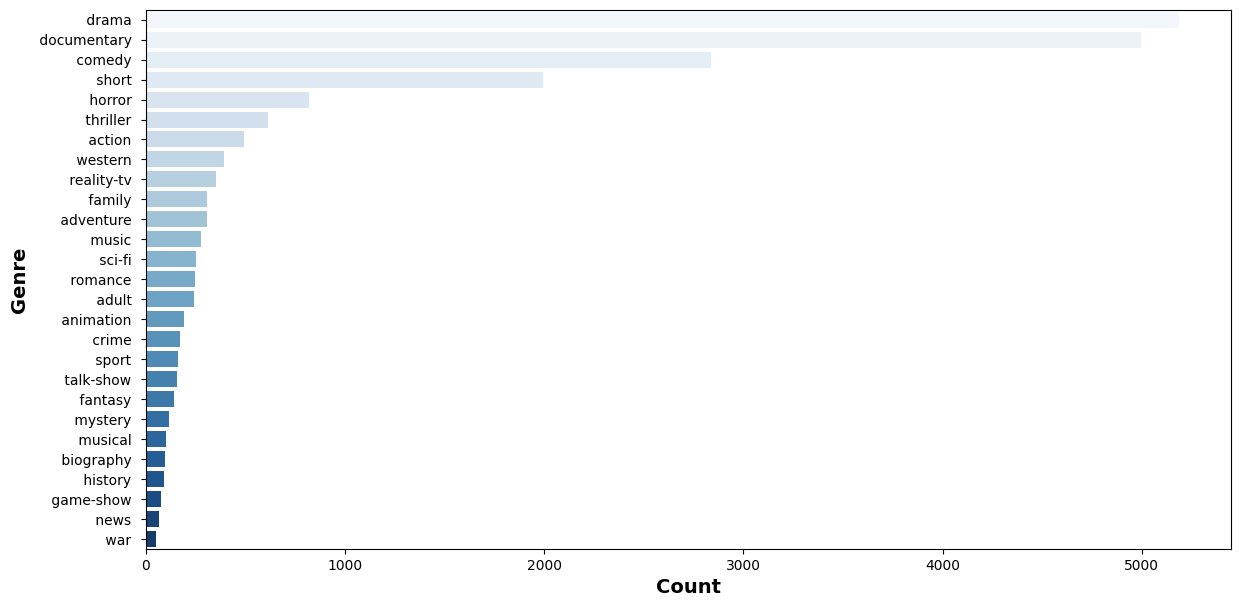

In [11]:
# Plot the distribution of genres in the training data
plt.figure(figsize=(14, 7))
sns.countplot(data=train, y='Genre', order=train['Genre'].value_counts().index, palette='Blues')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('Genre', fontsize=14, fontweight='bold')



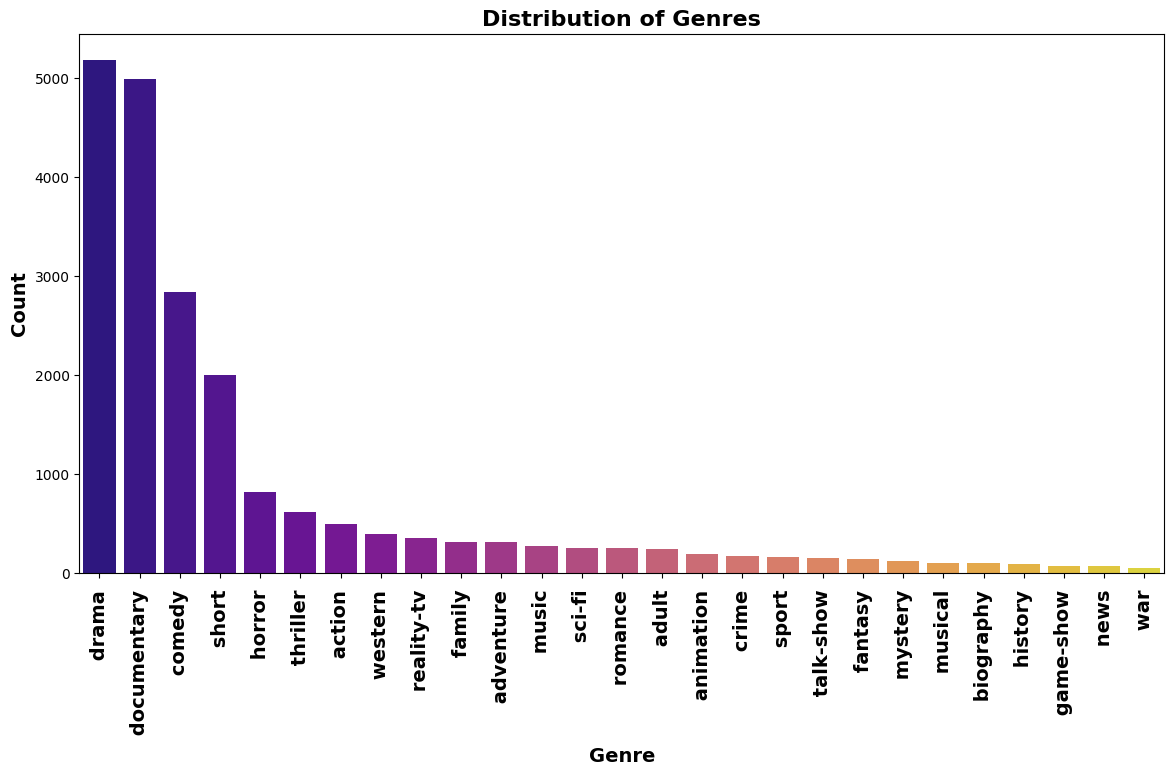

In [12]:
# Plot the distribution of genres using a bar plot
plt.figure(figsize=(14, 7))
counts = train['Genre'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='plasma')
plt.xlabel('Genre', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...


In [15]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [17]:

  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
lemmatizer = WordNetLemmatizer()

stopwords_set = set(stopwords.words('english'))
def text_prep(text):
    c_text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    c_text = c_text.lower()
    tokens = c_text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords_set]
    return " ".join(tokens)
train['Description']=train['Description'].apply(text_prep)
train

,Title,Genre,Description
0,Oscar et la dame rose (2009),drama,listening conversation doctor parent yearold o...
1,Cupid (1997),thriller,brother sister past incestuous relationship cu...
2,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...
3,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...
4,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...
...,...,...,...
20748,Blocking the Path to 9/11 (2008),documentary,there story clinton two night september four m...
20749,"""The Collectors"" (1986)",drama,harry caines new custom surveyor district head...
20750,Venus in Fur (2017),drama,actress vanda meera director novacheckroger en...
20751,Behind the Movement (2018),drama,behind movement unique fastpaced retelling ros...


In [19]:
v = TfidfVectorizer()
transformed_output=v.fit_transform(train['Description'])

In [20]:
from sklearn.model_selection import train_test_split
y=train["Genre"]
X=transformed_output
X_train, X_test, y_train,y_test = train_test_split(
X,y,test_size=0.2,random_state=1)

In [21]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

y_train=lab_enc.fit_transform(y_train)
y_test=lab_enc.transform(y_test)

## ***NAIVE BAYES***

In [22]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_train = nb.predict(X_train)
y_pred_test= nb.predict(X_test)
accuracy_train_nb = accuracy_score(y_train,y_pred_train)
accuracy_test_nb = accuracy_score(y_test,y_pred_test)
print(f"Accuracy of train : {accuracy_train_nb}")
print(f"Accuracy of test : {accuracy_test_nb}")

Accuracy of train : 0.4694012769545838
Accuracy of test : 0.42688508793061913


In [26]:
df_test = pd.read_csv('test_data.txt',sep=" ::: ",header=None,engine='python',names=['Name','Description'])

In [27]:
df_test['Description']=df_test['Description'].apply(text_prep)
df_test

,Name,Description
1,Edgar's Lunch (1998),lr brane love life car apartment job especiall...
2,La guerra de papá (1977),spain march quico naughty child three belongin...
3,Off the Beaten Track (2010),one year life albin family shepherd north tran...
4,Meu Amigo Hindu (2015),father died hasnt spoken brother year serious ...
5,Er nu zhai (1955),known internationally martial art superstar br...
...,...,...
21266,Breakup.com (2008),main character breakupcom clever opportunistic...
21267,Hiyab (2005),secondary school spanish city hallway tutor ta...
21268,The House of the White Bee (2019),story sparked vivid poetry pablo neruda come l...
21269,Ema (2017),ema siren guided dead soul purgatory year serv...


In [28]:
X_tfidf_test= v.transform(df_test['Description'])
X_tfidf_test

<21270x75853 sparse matrix of type '<class 'numpy.float64'>'
	with 973224 stored elements in Compressed Sparse Row format>

In [29]:
X_tfidf_test.shape

(21270, 75853)

In [32]:
y_predicted = nb.predict(X_tfidf_test)
y_predicted_genre=lab_enc.inverse_transform(y_predicted)
df_test['Predicted Genre']= y_predicted_genre
test_data_solution = pd.read_csv('test_data_solution.txt',sep = ' ::: ',header=None,engine='python',names=['Title','Genre','Description'])
df_test['Actual Genre']= test_data_solution['Genre']


random_rows = df_test.sample(n=7)
random_rows

,Name,Description,Predicted Genre,Actual Genre
9332,The Whisperers: the Superhero Series Movie (2016),whisperer quintessential firstever nevereverse...,documentary,drama
16666,Hamsayeh (2010),story drift life five generation mother daught...,drama,drama
12513,Finding Hope Now (2014),inspired true story rev roger minassian age le...,drama,drama
12085,A True Story in Memory of Zach Hanks (2003),story independent filmmaker experience shootin...,drama,short
13682,"Stromboli, terra di Dio (1950)",living italian refugee camp beautiful karen me...,drama,drama
13281,"Ah, Wilderness! (1959)",fourth july holiday miller family prepares cel...,drama,drama
18412,La chica del gato (1964),guadalupe orphan girl taken since childhood eu...,drama,comedy
